In [14]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [15]:
TRAIN_DIR = 'C:\\Users\\Sumanth G\\Downloads\\archive(4)\\images\\train'
TEST_DIR = 'C:\\Users\\Sumanth G\\Downloads\\archive(4)\\images\\test'
folder_path='C:\\Users\\Sumanth G\\Downloads\\archive(4)\\images\\'

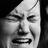

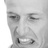

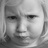

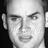

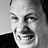

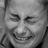

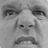

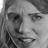

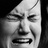

In [16]:
expression = 'disgust'
from IPython.display import display, Image
for i in range(1, 10, 1):
    img_path = folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i]
    img = Image(filename=img_path, format='png', width=48, height=48)
    display(img)

In [17]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [18]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [19]:
print(train)

                                                   image     label
0      C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
1      C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
2      C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
3      C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
4      C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
...                                                  ...       ...
28816  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
28817  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
28818  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
28819  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
28820  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise

[28821 rows x 2 columns]


In [20]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [21]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
1     C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
2     C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
3     C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
4     C:\Users\Sumanth G\Downloads\archive(4)\images...     angry
...                                                 ...       ...
7061  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
7062  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
7063  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
7064  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise
7065  C:\Users\Sumanth G\Downloads\archive(4)\images...  surprise

[7066 rows x 2 columns]
0       C:\Users\Sumanth G\Downloads\archive(4)\images...
1       C:\Users\Sumanth G\Downloads\archive(4)\images...
2       C:\Users\Sumanth G\Downloads\archive(4)\images...
3       C

In [22]:
from tqdm.notebook import tqdm

In [23]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [24]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Sumanth G\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [25]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [26]:
x_train = train_features/255.0
x_test = test_features/255.0

In [27]:
x_train.shape

(28821, 48, 48, 1)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [30]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [31]:
y_train

array([0, 0, 0, ..., 6, 6, 6])

In [32]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [33]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [34]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 256)       0

In [36]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [37]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 2, validation_data = (x_test,y_test)) 

Epoch 1/2
190/226 [========================>.....] - ETA: 2:49 - loss: 1.8252 - accuracy: 0.2445

KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [ ]:


from keras.models import model_from_json



In [ ]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [41]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [42]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [43]:
image = 'C:\\Users\\Sumanth G\\Downloads\\archive(4)\\images\\train\\sad\\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 253ms/step
model prediction is  happy


In [44]:
image = 'C:\\Users\\Sumanth G\\Downloads\\archive(4)\\images\\train\\fear\\2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of fear
1/1 [==============================] - 0s 469ms/step
model prediction is  happy


In [45]:
image = 'C:\\Users\\Sumanth G\\Downloads\\archive(4)\\images\\train\\disgust\\299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)


original image is of disgust
1/1 [==============================] - 0s 250ms/step
model prediction is  happy
